<a href="https://colab.research.google.com/github/ArianIR77/dog-breed-prediction/blob/main/Dog_Breed_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# connect kaggle to colab notebook
from google.colab import files
files.upload()
""

Saving kaggle.json to kaggle.json


''

In [2]:
# install kaggle api
!pip install -q kaggle

In [3]:
#setting up kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# creating and changing the cirrent directory

!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


In [5]:
# searching for dataset
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           4752          8  0.1764706        


In [6]:
#downloading the dataset
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..

 99% 687M/691M [00:08<00:00, 115MB/s]
100% 691M/691M [00:08<00:00, 83.3MB/s]
/content


In [7]:
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv


Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset/train/840db91b

In [8]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

In [9]:
#reading the dataset
df = pd.read_csv("dog_dataset/labels.csv")

In [10]:

df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
df.shape

(10222, 2)

In [12]:
# number of each breed
df["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [13]:
# selecting the first 3 breeds
names = [ "scottish_deerhound", "maltese_dog", "afghan_hound"]
df_mini = df[(df["breed"].isin(names))]
df_mini = df_mini.reset_index().drop(['index'], axis=1)
df_mini.head()

,id,breed
0,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,0379145880ad3978f9b80f0dc2c03fba,afghan_hound


In [14]:
df_mini.shape

(359, 2)

In [15]:
#creating numpy matrix with zeros
X_data = np.zeros((len(df_mini),224,224,3), dtype="float32")
# one hot encoding
Y_data = label_binarize(df_mini["breed"], classes=names)

#converting image to numpy array and normalizing dataset
for i in tqdm(range(len(df_mini))):
  img = image.load_img("dog_dataset/train/%s.jpg" % df_mini["id"][i], target_size=(224,224))
  img = image.img_to_array(img)
  x= np.expand_dims(img.copy(), axis=0)
  X_data[i]= x/255.0

100%|██████████| 359/359 [00:00<00:00, 466.86it/s]


In [16]:
# building the model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size=(3,3), activation="relu", kernel_regularizer="l2"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size=(3,3), activation="relu", kernel_regularizer="l2"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 8, kernel_size=(3,3), activation="relu", kernel_regularizer="l2"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation = "relu",  kernel_regularizer="l2"))
model.add(Dropout(0.5))

model.add(Dense(64, activation = "relu",  kernel_regularizer="l2"))
model.add(Dropout(0.5))

model.add(Dense(len(names), activation = "softmax"))


model.compile(loss = "categorical_crossentropy", optimizer=Adam(0.0001), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 32)        0

In [18]:
# spliting data in training and testing
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size=0.1)

# spliting data in training and validation set
X_train , X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size=0.2)

In [19]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience=25)


In [20]:
#training the model
epochs = 1000

batch_size = 32

history = model.fit(X_train, Y_train, batch_size= batch_size, epochs=epochs, validation_data=(X_val,Y_val),callbacks=[early_stop])

Epoch 1/1000
9/9 [==============================] - 11s 273ms/step - loss: 5.0675 - accuracy: 0.3760 - val_loss: 4.9515 - val_accuracy: 0.2000
Epoch 2/1000
9/9 [==============================] - 1s 120ms/step - loss: 4.9658 - accuracy: 0.3605 - val_loss: 4.9049 - val_accuracy: 0.2000
Epoch 3/1000
9/9 [==============================] - 1s 123ms/step - loss: 4.9063 - accuracy: 0.3023 - val_loss: 4.8589 - val_accuracy: 0.2462
Epoch 4/1000
9/9 [==============================] - 1s 123ms/step - loss: 4.8352 - accuracy: 0.3760 - val_loss: 4.8138 - val_accuracy: 0.2154
Epoch 5/1000
9/9 [==============================] - 1s 121ms/step - loss: 4.8132 - accuracy: 0.3372 - val_loss: 4.7684 - val_accuracy: 0.2308
Epoch 6/1000
9/9 [==============================] - 1s 122ms/step - loss: 4.7531 - accuracy: 0.3605 - val_loss: 4.7230 - val_accuracy: 0.2154
Epoch 7/1000
9/9 [==============================] - 1s 122ms/step - loss: 4.7094 - accuracy: 0.3333 - val_loss: 4.6779 - val_accuracy: 0.2308
Epoch

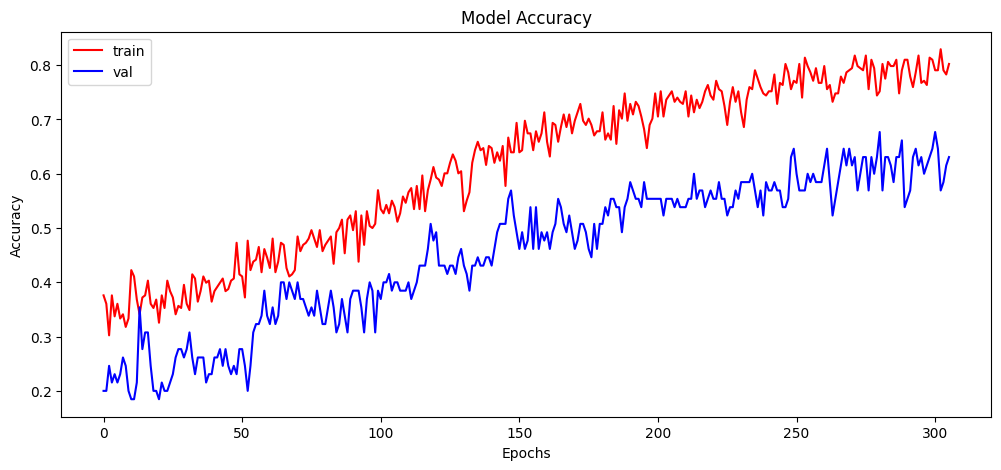

In [21]:
#plot the training history
from matplotlib import pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['train', 'val'])

In [22]:
losses = pd.DataFrame(history.history)


<Axes: >

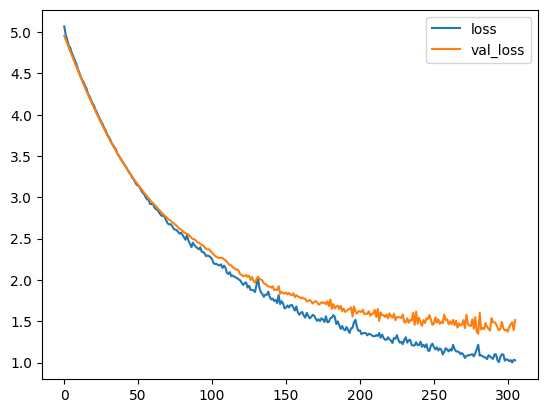

In [23]:
losses[['loss','val_loss']].plot()


In [24]:
# Prediction
predictions = model.predict(X_test)

# Evaluation
score = model.evaluate(X_test, Y_test)

# Print accuracy
accuracy = score[1] * 100
print("Accuracy over test set:\n", round(accuracy, 2), "%")


2/2 [==============================] - 0s 11ms/step - loss: 1.1742 - accuracy: 0.7778
Accuracy over test set:
 77.78 %


Originally :  scottish_deerhound
Predicted :  scottish_deerhound


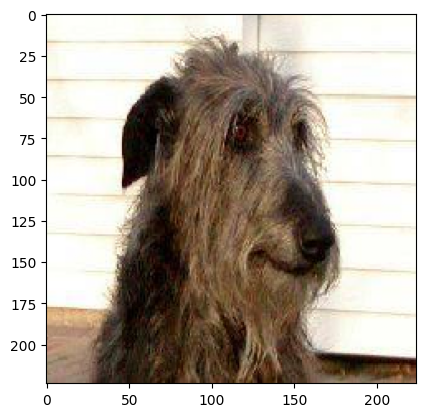

In [25]:
# Compare original and predicted

plt.imshow(X_test[1,:,:,:])


# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ", df_mini['breed'][np.argmax (Y_test [17])])
print("Predicted : ", df_mini['breed'][np.argmax(predictions[17])])

In [26]:
model.save("dog_breed.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
